In [1]:
const ROOT = pwd()

using Distributed
nprocs() < 10 && addprocs(10) # uncomment to use multiple processes

@everywhere begin
    import Pkg
    Pkg.activate($ROOT)
end

@everywhere begin
    using QuantumCircuits
    using QuantumOptics
    using Statistics
    using Random
    using LinearAlgebra
end

  Activating  Activating  Activating  Activating  environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
  Activating  Activating  Activating  environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
 environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
   Activating environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`  Activating

 environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
 environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`
  Activating environment at `~/Documents/work/Summer 2021/QuantumCircuits.jl/Project.toml`

┌ Info: Precompiling QuantumCircuits [01625e0c-f410-4aff-9d33-8c5e8b164a60]
└ @ Base loadi

In [9]:
using HDF5

In [2]:
using Plots

In [269]:
using SignalAnalysis, DSP

In [3]:
@everywhere begin
    # Basis
    q = SpinBasis(1//2)

    # Operators
    σx = sigmax(q)
    σy = sigmay(q)
    σz = sigmaz(q)
    id = identityoperator(q)

    # Initial condition
    ρ0 = dm(spinup(q))
    ρ1 = dm(spindown(q))
    σm = (σx + im*σy)/2
    u = (ρ0 + ρ1)/2
    
    # Helpers
    expects = ρ -> collect(real(expect(ρ, s)) for s in [σx,σy,σz])
    F(ρ,σ) = norm(tr(sqrt(sqrt(σ.data)*ρ.data*sqrt(σ.data))))^2
    average(ρt) = sum(ρt, dims=1)'/size(ρt)[1]
end

In [623]:
ΩR

218510.77565095885

In [626]:
T = (0, 40*2e-7)
dt = 1e-9

κ = 2π*(1.56e6)
χ = 2π*(-0.47e6)
η = 0.17
γ1 = 1/(160e-6)
γϕ = 1/(16e-6)
ΩR = 2π*0.204e6
θtilt = atan(2ΩR/κ)
ηz = cos(θtilt)^2
n̄ = 0.22
Γₘ = 8ηz*χ^2*n̄/κ / (1 + ηz*(2χ/κ)^2)
τₘ = 1/(η*Γₘ)
σ = √(τₘ/dt)
ẑeff = cos(θtilt)*σz - sin(θtilt)*σy

J = [sqrt((1-η)*Γₘ/2)*ẑeff, sqrt(γ1)σm, sqrt(γϕ/2)σz]
C = [ẑeff/√τₘ]
H0 = (ΩR/2) * (cos(θtilt)*σx + sin(θtilt)*σy)

Operator(dim=2x2)
  basis: Spin(1/2)
          ⋅            6.2003e5-1.62162e5im
 6.2003e5+1.62162e5im           ⋅    

In [629]:
# Random.seed!(1)
tt, ρt, dy = @time ensemble(bayesian, T, ρ0, H0, J, C; dt=dt, N=1);

  4.677794 seconds (239.68 k allocations: 11.840 MiB)


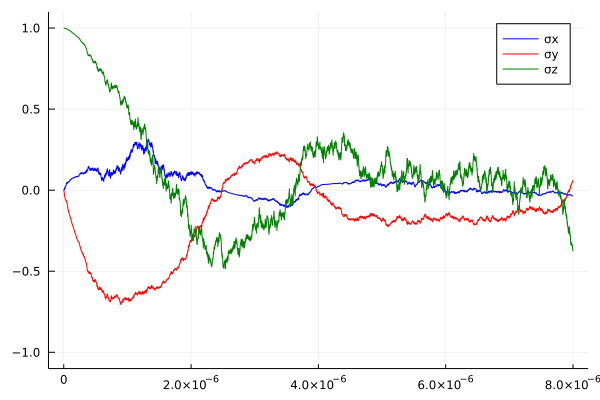

In [630]:
eρt = expects.(ρt[1])
plot(tt, map(x -> x[1], eρt), color="blue", label="σx")
plot!(tt, map(x -> x[2], eρt), color="red", label="σy")
plot!(tt, map(x -> x[3], eρt), color="green", label="σz")
ylims!(-1.1,1.1)

In [631]:
Zfid = h5open("../Trajectories.jl/data/driven/processed/19-45-49-6673-0014-Z.pickle.h5")

🗂️ HDF5.File: (read-only) ../Trajectories.jl/data/driven/processed/19-45-49-6673-0014-Z.pickle.h5
├─ 📂 t_0
│  ├─ 🔢 N_reps
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_1
│  ├─ 🔢 I
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_10
│  ├─ 🔢 I
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_11
│  ├─ 🔢 I
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_12
│  ├─ 🔢 I
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_13
│  ├─ 🔢 I
│  ├─ 🔢 N_reps
│  ├─ 🔢 Q
│  ├─ 🔢 Tm
│  ├─ 🔢 dt
│  ├─ 🔢 final_ro_results
│  ├─ 🔢 integration_time
│  └─ 🔢 strong_ro_classifications
├─ 📂 t_14
│  ├─ 🔢 

In [45]:
t40 = Zfid["t_40"]

📂 HDF5.Group: /t_40 (file: ../Trajectories.jl/data/undriven/processed/13-12-47-4672-Z.pickle.h5)
├─ 🔢 I
├─ 🔢 I_processed
├─ 🔢 N_reps
├─ 🔢 Q
├─ 🔢 Q_processed
├─ 🔢 Tm
├─ 🔢 dt
├─ 🔢 final_ro_results
├─ 🔢 integration_time
└─ 🔢 strong_ro_classifications

In [162]:
I = read(t40["I"])
Q = read(t40["Q"])
sro = read(t40["strong_ro_classifications"]);

In [559]:
Z = I + im*Q;

In [525]:
using MultivariateStats, Statistics, DSP
function tunerecord(Z, σ; w=3.493e8, bandwidth=0.08e8, fs=1/1e-9)
    # filter record
    f = iirnotch(w, bandwidth; fs=fs)
    Zf = filt(f, Z)

    # scale and shift
    ρ = σ/std(Zf)
    Zf = ρ*(Zf .- mean(Zf))
    
    # PCA to find angle
    Z̄f = mean(Zf; dims=1)'
    M = fit(PCA, hcat(real(Z̄f), imag(Z̄f))').proj[1,:]
    θz = -imag(log(M[1] + im*M[2]))
    
    # rotate
    return Zf * exp(im*θz)
end

tunerecord (generic function with 1 method)

In [526]:
Zf = tunerecord(Z, σ)
Z̄ = mean(Z; dims=2); z̄ = mean(Z; dims=1)';
Z̄f = mean(Zf; dims=2); z̄f = mean(Zf; dims=1)';

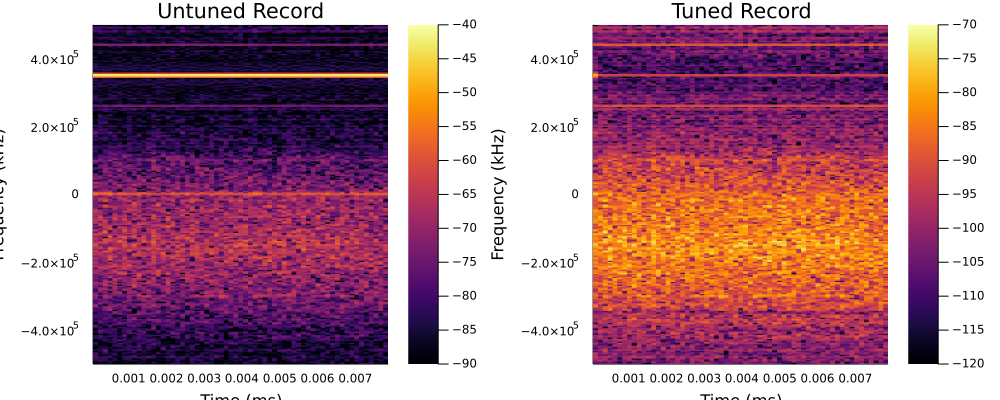

In [532]:
a = specgram(Z̄; fs=1/dt)
title!("Untuned Record")
b = specgram(Z̄f; fs=1/dt)
title!("Tuned Record")
plot(a, b, size=(1000,400))

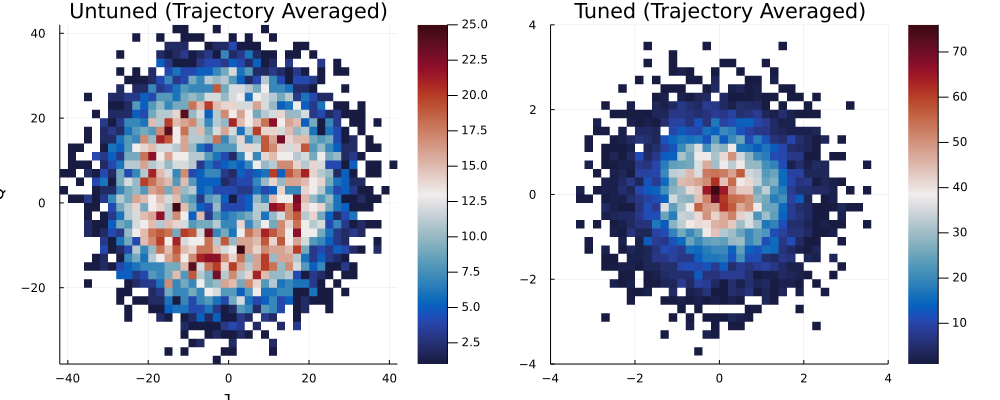

In [560]:
a = histogram2d(real(Z̄), imag(Z̄); color=:balance, nbins=50, title="Untuned (Trajectory Averaged)", xlabel="Ī", ylabel="Q̄")
b = histogram2d(real(Z̄f), imag(Z̄f); color=:balance, nbins=50, xlims=(-4, 4), ylims=(-4, 4), title="Tuned (Trajectory Averaged)")
plot(a, b; size=(1000,400))

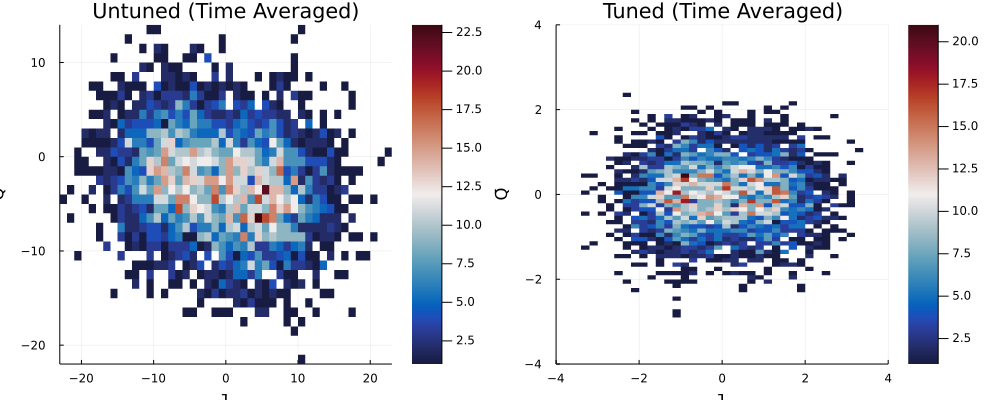

In [561]:
a = histogram2d(real(z̄), imag(z̄); color=:balance, nbins=50, xlabel="Ī", ylabel="Q̄", title="Untuned (Time Averaged)")
b = histogram2d(real(z̄f), imag(z̄f); color=:balance, nbins=50, xlims=(-4, 4), ylims=(-4, 4), xlabel="Ī", ylabel="Q̄", title="Tuned (Time Averaged)")
plot(a, b; size=(1000,400))

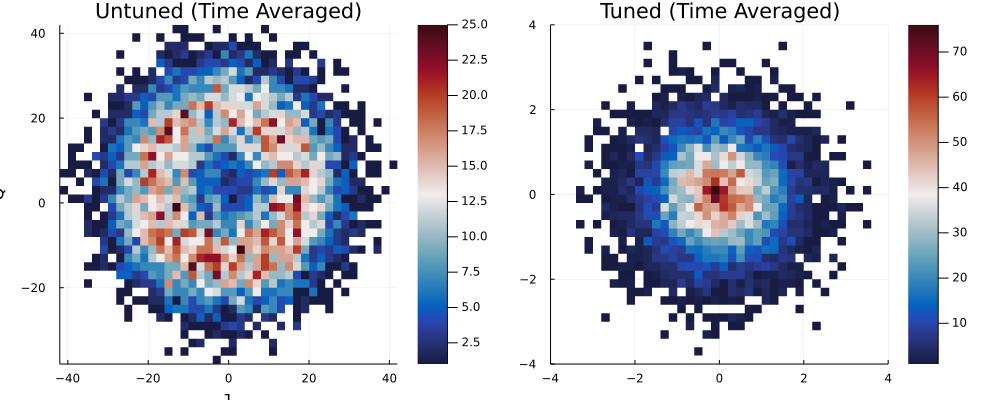

In [562]:
a = histogram2d(real(Z̄), imag(Z̄); color=:balance, nbins=50, title="Untuned (Time Averaged)", xlabel="Ī", ylabel="Q̄")
b = histogram2d(real(Z̄f), imag(Z̄f); color=:balance, nbins=50, xlims=(-4, 4), ylims=(-4, 4), title="Tuned (Time Averaged)")
plot(a, b; size=(1000,400))

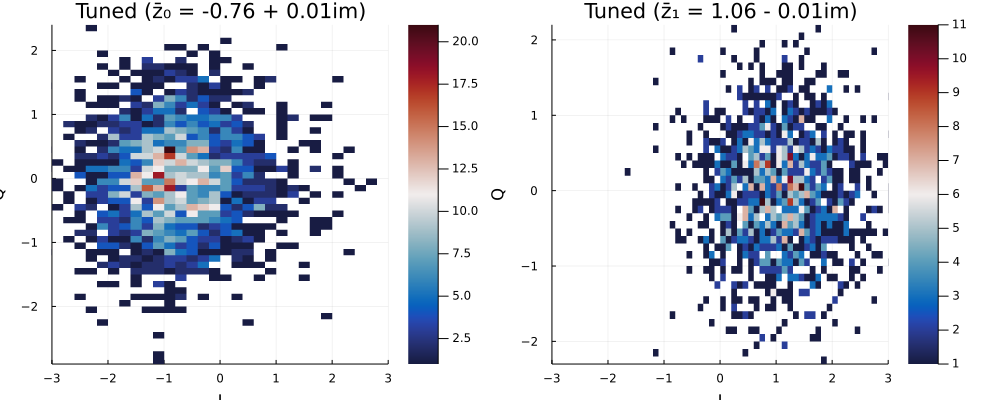

In [563]:
inds₀ = findall(x -> x == 0, sro)
inds₁ = findall(x -> x == 1, sro);
z̄₀ = z̄f[inds₀]
z̄₁ = z̄f[inds₁]
z̄̄₀ = round(mean(z̄₀), digits=2)
z̄̄₁ = round(mean(z̄₁), digits=2)
a = histogram2d(real(z̄₀), imag(z̄₀); color=:balance, nbins=50, xlims=(-3, 3), xlabel="I", ylabel="Q", title="Tuned (z̄₀ = $z̄̄₀)")
b = histogram2d(real(z̄₁), imag(z̄₁); color=:balance, nbins=50, xlims=(-3, 3), xlabel="I", ylabel="Q", title="Tuned (z̄₁ = $z̄̄₁)")
plot(a, b, size=(1000, 400))

In [612]:
histogram2d(real(Zf[:,1]), imag(Zf[:,1]); color=:balance, nbins=50, xlims=(-3, 3), xlabel="I", ylabel="Q", title="Tuned Trajectory #1")

In [634]:
Zf₀ = Zf/√τₘ
record = [[Zf₀'[i,:]] for i in 1:size(Zf₀,2)]
tt, ρt, dy = @time ensemble(bayesian, (0, 40*2e-7 + 40*1e-9), ρ0, H0, J, C; dt=dt, record=record, N=10);

134.930420 seconds (2.75 M allocations: 132.863 MiB, 11.27% gc time, 0.02% compilation time)


In [635]:
N = length(ρt)
TT = length(tt)
p = plot()

x̄ = zeros(TT)
ȳ = zeros(TT)
z̄ = zeros(TT)

for n in 1:N
    eρt = expects.(ρt[n])
    x = map(x -> x[1], eρt)
    y = map(x -> x[2], eρt)
    z = map(x -> x[3], eρt)
    plot!(tt, x, alpha=0.1, color="blue", label=nothing)
    plot!(tt, y, alpha=0.1, color="red", label=nothing)
    plot!(tt, z, alpha=0.1, color="green", label=nothing)
    ylims!(-1.1,1.1)
    x̄ += x
    ȳ += y
    z̄ += z
end

x̄ = x̄/N
ȳ = ȳ/N
z̄ = z̄/N

plot!(tt, x̄, color="blue", label="⟨σ₁⟩")
plot!(tt, ȳ, color="red", label="⟨σ₂⟩")
plot!(tt, z̄, color="green", label="⟨σ₃⟩")

xlabel!("Time (s)")

p